In [1]:
import sys
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sys.path.append(os.path.abspath(".."))

from src.config import DATA_PATH, TARGET_COLUMN
from src.data_loader import load_data

In [2]:
# Load the dataset
df = load_data(DATA_PATH)

In [3]:
# Display the first few rows of the dataframe
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700


In [4]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Show the shape of the dataframe
df.shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 10098 rows and 7 columns.


In [6]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10098 non-null  datetime64[ns]
 1   Open       10098 non-null  float64       
 2   High       10098 non-null  float64       
 3   Low        10098 non-null  float64       
 4   Close      10098 non-null  float64       
 5   Adj Close  10098 non-null  float64       
 6   Volume     10098 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 552.4 KB
None


In [7]:
# Check for missing values
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Display summary statistics
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,10098,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000
mean,2000-03-15 15:28:29.090909056,2.479037,3.638755,3.512713,3.576238,3.245732,7977.757972
min,1980-03-17 00:00:00,0.000000,0.437500,0.375000,0.437500,0.404299,0.000000
25%,1990-03-12 06:00:00,1.500000,2.125000,2.000000,2.062500,1.912910,1000.000000
50%,2000-03-07 12:00:00,2.410000,3.010000,2.937500,3.000000,2.772334,3300.000000
75%,2010-03-22 18:00:00,3.375000,4.170000,4.050000,4.100000,3.843033,9000.000000
max,2020-04-01 00:00:00,13.800000,15.800000,15.400000,15.800000,13.881437,581500.000000
std,NaN,1.792743,2.392151,2.349184,2.361792,2.028279,16239.129044


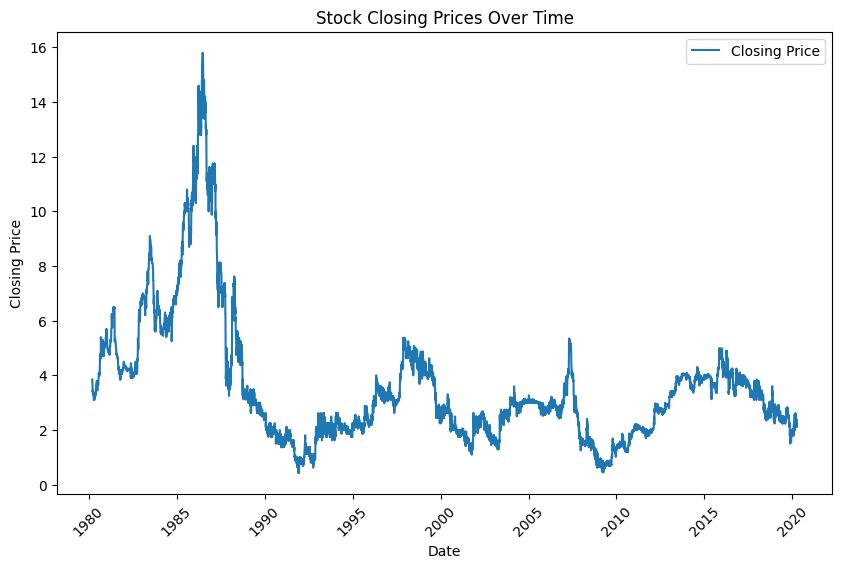

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot the target variable over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df[TARGET_COLUMN], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()
plt.clf()

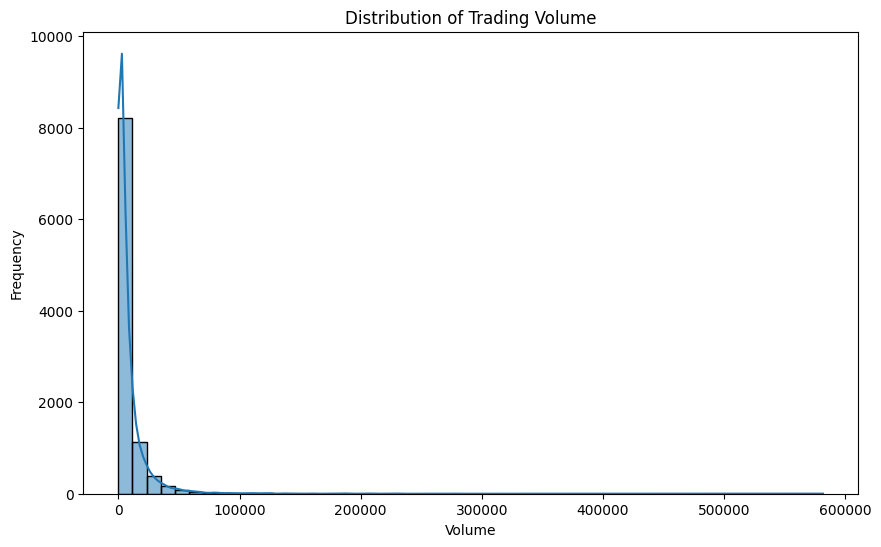

<Figure size 640x480 with 0 Axes>

In [10]:
# Plot the distribution of the volume traded
plt.figure(figsize=(10, 6))
sns.histplot(df['Volume'], bins=50, kde=True)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume')
plt.show()
plt.clf()

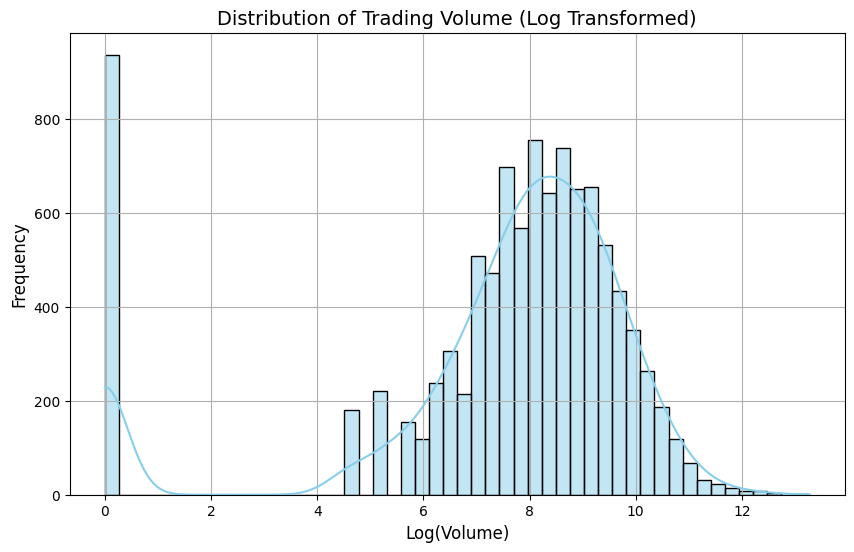

<Figure size 640x480 with 0 Axes>

In [11]:
# Log-transform the volume to handle skewness
df['Log_Volume'] = np.log1p(df['Volume'])  # log1p to avoid log(0)

# Plot the distribution of the log-transformed volume
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Volume'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('Log(Volume)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Trading Volume (Log Transformed)', fontsize=14)

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()
plt.clf()